# Import Libraries

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree

from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

In [2]:
df  = pd.read_csv('diabetes.csv')
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [4]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


## Train Test Split

In [6]:
x = df.drop('Outcome',axis=1)
y = df['Outcome']

In [7]:
# Train Test Split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=1, stratify=y)

In [8]:
y_train.value_counts()

0    400
1    214
Name: Outcome, dtype: int64

# Train Model

In [10]:
dt_model = DecisionTreeClassifier()
dt_model.fit(x_train,y_train)

DecisionTreeClassifier()

In [16]:
y_test.shape

(154,)

In [15]:
# Testing Accuracy
y_pred = dt_model.predict(x_test)
test_accuracy = accuracy_score(y_test, y_pred)
print('Test Data Accuracy is:\n',test_accuracy)

clf_report = classification_report(y_test, y_pred)
print('Classification Report :\n',clf_report)

cnf_matrix = confusion_matrix(y_test, y_pred)
print('Confusion Matrix :\n',cnf_matrix)

Test Data Accuracy is:
 0.7272727272727273
Classification Report :
               precision    recall  f1-score   support

           0       0.77      0.83      0.80       100
           1       0.63      0.54      0.58        54

    accuracy                           0.73       154
   macro avg       0.70      0.68      0.69       154
weighted avg       0.72      0.73      0.72       154

Confusion Matrix :
 [[83 17]
 [25 29]]


In [17]:
# Training Accuracy
y_pred_train = dt_model.predict(x_train)
test_accuracy = accuracy_score(y_train, y_pred_train)
print('Test Data Accuracy is:\n',test_accuracy)

clf_report = classification_report(y_train, y_pred_train)
print('Classification Report :\n',clf_report)

cnf_matrix = confusion_matrix(y_train, y_pred_train)
print('Confusion Matrix :\n',cnf_matrix)

Test Data Accuracy is:
 1.0
Classification Report :
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       400
           1       1.00      1.00      1.00       214

    accuracy                           1.00       614
   macro avg       1.00      1.00      1.00       614
weighted avg       1.00      1.00      1.00       614

Confusion Matrix :
 [[400   0]
 [  0 214]]


## Plot Decision Tree

[Text(2375.0128944174758, 5276.117647058823, 'Glucose <= 127.5\ngini = 0.454\nsamples = 614\nvalue = [400, 214]\nclass = 0'), Text(854.5221480582524, 4956.35294117647, 'Age <= 28.5\ngini = 0.303\nsamples = 382\nvalue = [311, 71]\nclass = 0'), Text(460.4854368932039, 4636.588235294118, 'BMI <= 45.4\ngini = 0.14\nsamples = 211\nvalue = [195, 16]\nclass = 0'), Text(352.13592233009706, 4316.823529411765, 'Pregnancies <= 7.5\ngini = 0.126\nsamples = 208\nvalue = [194, 14]\nclass = 0'), Text(297.9611650485437, 3997.0588235294117, 'BMI <= 31.3\ngini = 0.118\nsamples = 207\nvalue = [194, 13]\nclass = 0'), Text(108.3495145631068, 3677.294117647059, 'DiabetesPedigreeFunction <= 0.672\ngini = 0.017\nsamples = 117\nvalue = [116, 1]\nclass = 0'), Text(54.1747572815534, 3357.529411764706, 'gini = 0.0\nsamples = 102\nvalue = [102, 0]\nclass = 0'), Text(162.52427184466018, 3357.529411764706, 'DiabetesPedigreeFunction <= 0.686\ngini = 0.124\nsamples = 15\nvalue = [14, 1]\nclass = 0'), Text(108.34951456

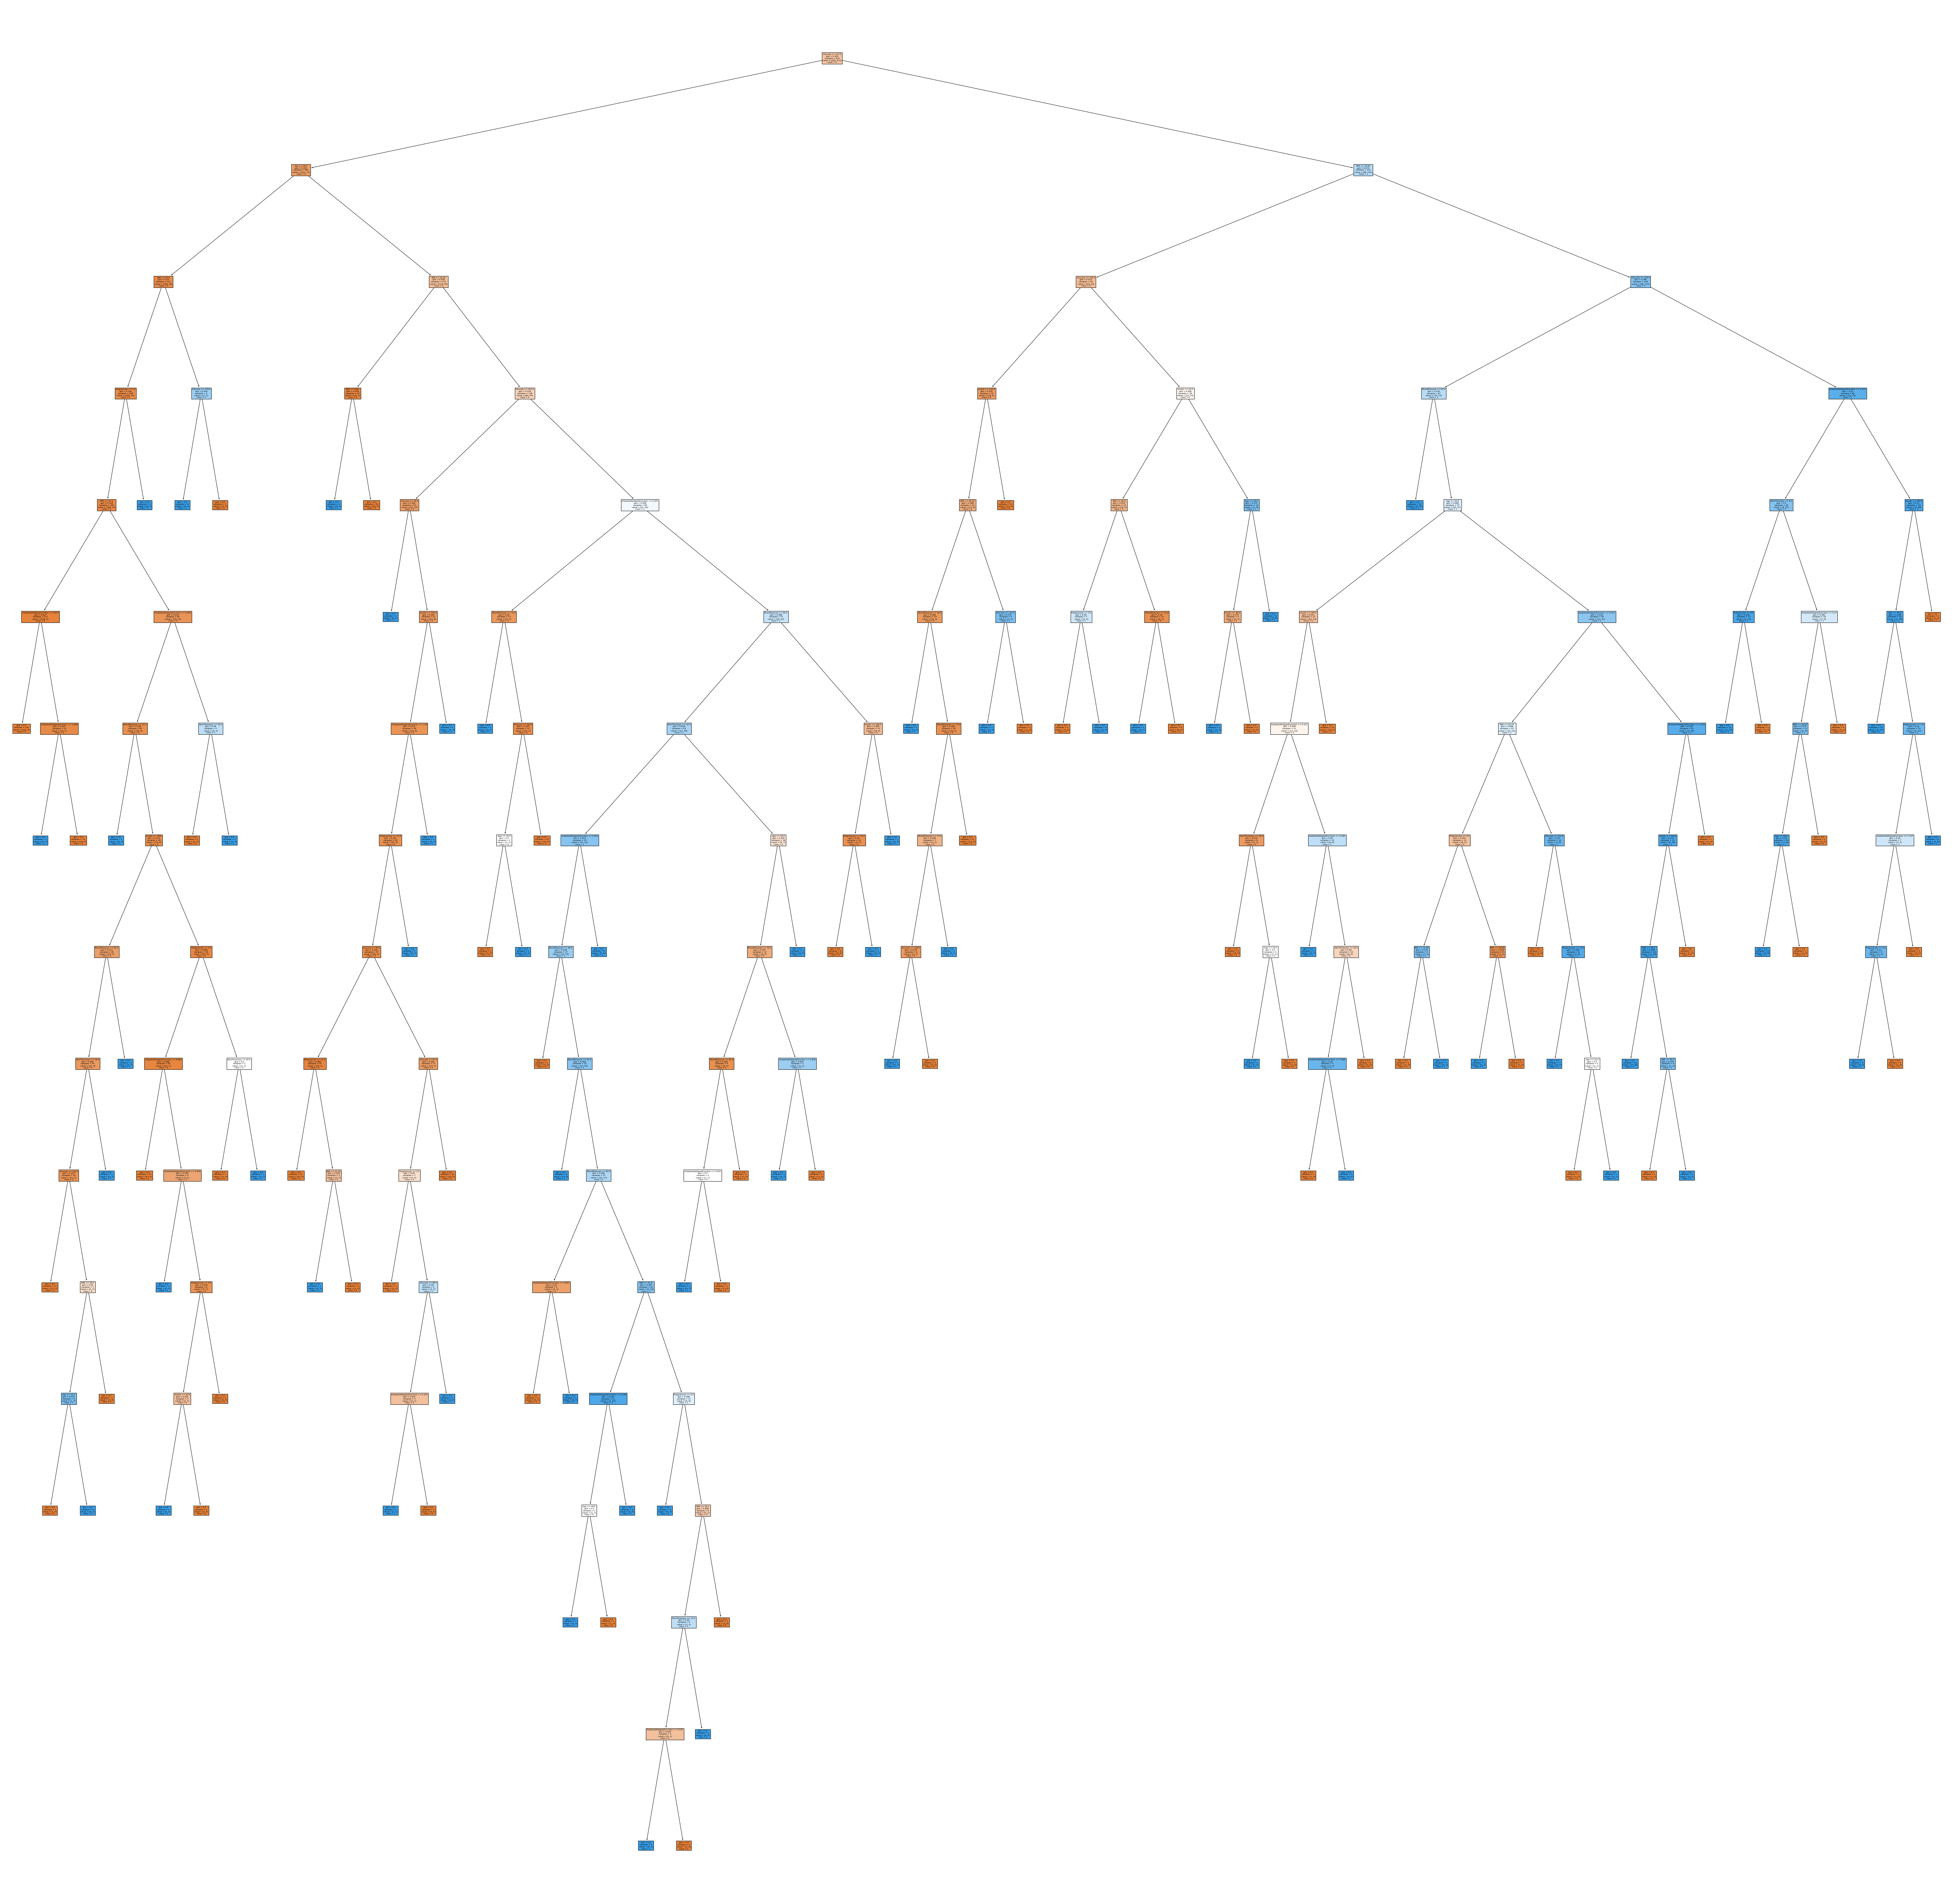

In [20]:
plt.figure(figsize=(100,100))
tree = plot_tree(decision_tree=dt_model, feature_names= df.columns, class_names=['0','1'],filled=True)
print(tree)
plt.savefig('Decision_Tree.png')

In [21]:
dt_model = DecisionTreeClassifier(max_depth=4)
dt_model.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=4)

In [22]:
# Testing Accuracy
y_pred = dt_model.predict(x_test)
test_accuracy = accuracy_score(y_test, y_pred)
print('Test Data Accuracy is:\n',test_accuracy)

clf_report = classification_report(y_test, y_pred)
print('Classification Report :\n',clf_report)

cnf_matrix = confusion_matrix(y_test, y_pred)
print('Confusion Matrix :\n',cnf_matrix)

Test Data Accuracy is:
 0.7532467532467533
Classification Report :
               precision    recall  f1-score   support

           0       0.85      0.75      0.80       100
           1       0.62      0.76      0.68        54

    accuracy                           0.75       154
   macro avg       0.74      0.75      0.74       154
weighted avg       0.77      0.75      0.76       154

Confusion Matrix :
 [[75 25]
 [13 41]]


In [23]:
# Training Accuracy
y_pred_train = dt_model.predict(x_train)
test_accuracy = accuracy_score(y_train, y_pred_train)
print('Test Data Accuracy is:\n',test_accuracy)

clf_report = classification_report(y_train, y_pred_train)
print('Classification Report :\n',clf_report)

cnf_matrix = confusion_matrix(y_train, y_pred_train)
print('Confusion Matrix :\n',cnf_matrix)

Test Data Accuracy is:
 0.7980456026058632
Classification Report :
               precision    recall  f1-score   support

           0       0.90      0.78      0.83       400
           1       0.67      0.84      0.74       214

    accuracy                           0.80       614
   macro avg       0.78      0.81      0.79       614
weighted avg       0.82      0.80      0.80       614

Confusion Matrix :
 [[310  90]
 [ 34 180]]


In [24]:
plt.figure(figsize=(200,100))
tree = plot_tree(decision_tree=dt_model, feature_names= df.columns, class_names=['0','1'],filled=True)
print(tree)
plt.savefig('Decision_Tree_2.png')

[Text(5580.0, 4892.4, 'Glucose <= 127.5\ngini = 0.454\nsamples = 614\nvalue = [400, 214]\nclass = 0'), Text(2790.0, 3805.2, 'Age <= 28.5\ngini = 0.303\nsamples = 382\nvalue = [311, 71]\nclass = 0'), Text(1395.0, 2718.0, 'BMI <= 45.4\ngini = 0.14\nsamples = 211\nvalue = [195, 16]\nclass = 0'), Text(697.5, 1630.7999999999997, 'Pregnancies <= 7.5\ngini = 0.126\nsamples = 208\nvalue = [194, 14]\nclass = 0'), Text(348.75, 543.5999999999995, 'gini = 0.118\nsamples = 207\nvalue = [194, 13]\nclass = 0'), Text(1046.25, 543.5999999999995, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]\nclass = 1'), Text(2092.5, 1630.7999999999997, 'DiabetesPedigreeFunction <= 0.545\ngini = 0.444\nsamples = 3\nvalue = [1, 2]\nclass = 1'), Text(1743.75, 543.5999999999995, 'gini = 0.0\nsamples = 2\nvalue = [0, 2]\nclass = 1'), Text(2441.25, 543.5999999999995, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]\nclass = 0'), Text(4185.0, 2718.0, 'BMI <= 26.35\ngini = 0.436\nsamples = 171\nvalue = [116, 55]\nclass = 0'), Text(3487.5,